In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import seaborn as sns

# Watching of Dataset

In [84]:
df = pd.read_csv("winequalityred.csv")

In [85]:
df.head(10)

,fixed_acidity,volatile_acidity,citric_acid,residualsugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residualsugar         1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [87]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residualsugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Data pre pcocessing and Visualization

In [88]:
df.isnull().sum().mean()

0.0

In [89]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [90]:
for cols in df:   
    df[cols].unique()
    print(cols)
    print(df[cols].unique())
    print("---------------------------")

fixed_acidity
[ 7.4  7.8 11.2  7.9  7.3  7.5  6.7  5.6  8.9  8.5  8.1  7.6  6.9  6.3
  7.1  8.3  5.2  5.7  8.8  6.8  4.6  7.7  8.7  6.4  6.6  8.6 10.2  7.
  7.2  9.3  8.   9.7  6.2  5.   4.7  8.4 10.1  9.4  9.   8.2  6.1  5.8
  9.2 11.5  5.4  9.6 12.8 11.  11.6 12.  15.  10.8 11.1 10.  12.5 11.8
 10.9 10.3 11.4  9.9 10.4 13.3 10.6  9.8 13.4 10.7 11.9 12.4 12.2 13.8
  9.1 13.5 10.5 12.6 14.  13.7  9.5 12.7 12.3 15.6  5.3 11.3 13.   6.5
 12.9 14.3 15.5 11.7 13.2 15.9 12.1  5.1  4.9  5.9  6.   5.5]
---------------------------
volatile_acidity
[0.7   0.88  0.76  0.28  0.66  0.6   0.65  0.58  0.5   0.615 0.61  0.62
 0.56  0.59  0.32  0.22  0.39  0.43  0.49  0.4   0.41  0.71  0.645 0.675
 0.685 0.655 0.605 0.38  1.13  0.45  0.67  0.52  0.935 0.29  0.31  0.51
 0.42  0.63  0.69  0.735 0.725 0.705 0.785 0.75  0.625 0.3   0.55  1.02
 0.775 0.9   0.545 0.575 0.33  0.54  1.07  0.695 1.33  0.745 1.04  0.715
 0.415 0.34  0.68  0.95  0.53  0.64  0.885 0.805 0.73  0.37  0.835 1.09
 0.57  0.44  0.635 0

In [91]:
#sns.pairplot(df, hue='quality')

<AxesSubplot:>

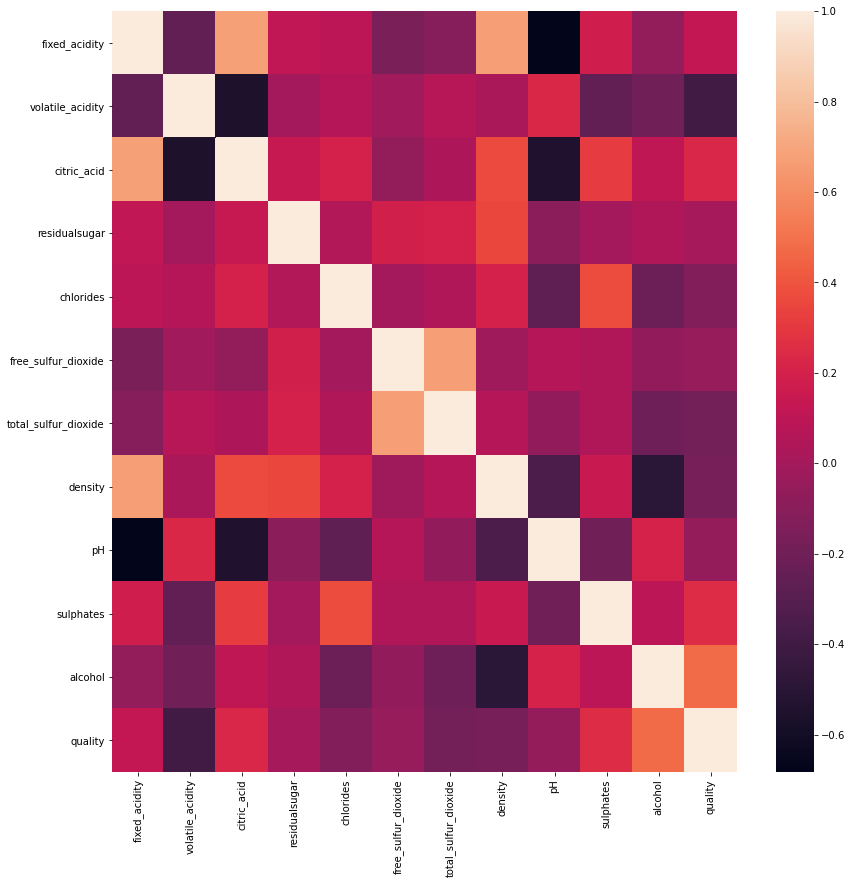

In [92]:
corr = df.corr()
fig = plt.figure(figsize=(14,14))
sns.heatmap(corr)

In [93]:
corr['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric_acid             0.226373
fixed_acidity           0.124052
residualsugar           0.013732
free_sulfur_dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total_sulfur_dioxide   -0.185100
volatile_acidity       -0.390558
Name: quality, dtype: float64

In [94]:
'''for i in df:
    sns.jointplot(x=i, y='quality', data=df, kind='hex')'''

"for i in df:\n    sns.jointplot(x=i, y='quality', data=df, kind='hex')"

In [95]:
'''for feature in df:
    fig = plt.figure(figsize=(12,4))
    df[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()'''

'for feature in df:\n    fig = plt.figure(figsize=(12,4))\n    df[feature].hist(bins=25)\n    plt.xlabel(feature)\n    plt.ylabel("Count")\n    plt.title(feature)\n    plt.show()'

In [96]:
'''for i in df: 
    plt.figure(figsize=(10,6))
    df.boxplot(column=[i])
    plt.show()'''

'for i in df: \n    plt.figure(figsize=(10,6))\n    df.boxplot(column=[i])\n    plt.show()'

In [97]:
df2 = df.copy()
df2.head()

,fixed_acidity,volatile_acidity,citric_acid,residualsugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# removing outliers

In [98]:
df2.loc[df2['fixed_acidity']>=12.2,'fixed_acidity']=12.2
df2.loc[df2['volatile_acidity']>=1,'volatile_acidity']=1
df2.loc[df2['residualsugar']>=3.5,'residualsugar']=3.5
df2.loc[df2['chlorides']>=0.12,'chlorides']=0.12
df2.loc[df2['chlorides']<=0.05,'chlorides']=0.05
df2.loc[df2['total_sulfur_dioxide']>=120,'total_sulfur_dioxide']=120
df2.loc[df2['free_sulfur_dioxide']>=42,'free_sulfur_dioxide']=42
df2.loc[df2['density']>=0.001,'density']=0.001
df2.loc[df2['density']<=0.9925,'density']=0.9925
df2.loc[df2['pH']>=3.65,'pH']=3.65
df2.loc[df2['pH']<=2.92,'pH']=2.92
df2.loc[df2['sulphates']>=1.00,'sulphates']=1.00
df2.loc[df2['alcohol']>=13.5,'alcohol']=13.5
df2.loc[df2['quality']<=5,'quality']=0

In [99]:
df2.loc[df2['quality']>=6,'quality']=1

In [100]:
'''reviews = []
for i in df2['quality']:
    if i >= 3 and i <= 4:
        reviews.append('1')
    elif i >= 5 and i <= 6:
        reviews.append('2')
    elif i >= 7 and i <= 8:
        reviews.append('3')
df2['Reviews'] = reviews'''

"reviews = []\nfor i in df2['quality']:\n    if i >= 3 and i <= 4:\n        reviews.append('1')\n    elif i >= 5 and i <= 6:\n        reviews.append('2')\n    elif i >= 7 and i <= 8:\n        reviews.append('3')\ndf2['Reviews'] = reviews"

In [101]:
'''for i in df2: 
    plt.figure(figsize=(10,6))
    df2.boxplot(column=[i])
    plt.show()'''

'for i in df2: \n    plt.figure(figsize=(10,6))\n    df2.boxplot(column=[i])\n    plt.show()'

In [102]:
df2['quality'].value_counts()

1    855
0    744
Name: quality, dtype: int64

In [103]:
df2.drop(["fixed_acidity","residualsugar","free_sulfur_dioxide","pH","chlorides","density"], axis = 1, inplace = True)

In [104]:
'''df2.drop(["quality"], axis = 1, inplace = True)'''

'df2.drop(["quality"], axis = 1, inplace = True)'

In [105]:
df2.head()

,volatile_acidity,citric_acid,total_sulfur_dioxide,sulphates,alcohol,quality
0,0.70,0.00,34.0,0.56,9.4,0
1,0.88,0.00,67.0,0.68,9.8,0
2,0.76,0.04,54.0,0.65,9.8,0
3,0.28,0.56,60.0,0.58,9.8,1
4,0.70,0.00,34.0,0.56,9.4,0


# Data Scaling

# Train-Test Split

In [106]:
y=df2['quality']
x=df2.drop(['quality'], axis = 1)

In [107]:
'''from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
x=pd.DataFrame(min_max.fit_transform(x),columns=x.columns)
x.head()'''

'from sklearn.preprocessing import MinMaxScaler\nmin_max=MinMaxScaler()\nx=pd.DataFrame(min_max.fit_transform(x),columns=x.columns)\nx.head()'

In [108]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix

In [109]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Training of data

In [110]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
score = classifier.score(x_test, y_test)
error = (mean_squared_error(y_test, y_pred))
print(score, error)

0.7375 0.2625


In [111]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)
score = svm.score(x_test, y_test)
error = (mean_squared_error(y_test, y_pred))
print(score, error)

0.596875 0.403125


In [112]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
pred = knn.predict(x_test)
score = knn.score(x_test, y_test)
error = np.sqrt(mean_squared_error(y_test, y_pred))
print(score, error)

0.703125 0.6349212549600147


In [113]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
pred = dtc.predict(x_test)
score = dtc.score(x_test, y_test)
error = np.sqrt(mean_squared_error(y_test, y_pred))
print(score, error)

0.7875 0.6349212549600147


In [114]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
pred = rfc.predict(x_test)
score = rfc.score(x_test, y_test)
error = np.sqrt(mean_squared_error(y_test, y_pred))
print(score, error)
print(confusion_matrix(y_test, pred))

0.828125 0.6349212549600147
[[121  27]
 [ 28 144]]


In [115]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)
score = svm.score(x_test, y_test)
error = np.sqrt(mean_squared_error(y_test, y_pred))
print(score, error)
print(confusion_matrix(y_test, y_pred))

0.596875 0.6349212549600147
[[ 46 102]
 [ 27 145]]


In [116]:
'''from sklearn.model_selection import cross_val_score
cvs = cross_val_score(RandomForestClassifier(), x_train, y_train, cv=10)
cvs,cvs.mean()'''

'from sklearn.model_selection import cross_val_score\ncvs = cross_val_score(RandomForestClassifier(), x_train, y_train, cv=10)\ncvs,cvs.mean()'

# Hyperparameter tuning

In [117]:
from sklearn.model_selection import GridSearchCV

In [118]:
params={
"n_estimators" : [10, 15, 20 ] ,
"min_samples_split" : [8,16],
"min_samples_leaf" : [ 1, 2, 3, 4, 5],
}

In [119]:
rfc_grid = GridSearchCV(estimator=rfc, 
                        param_grid=params,
                        scoring='accuracy',
                        cv=10,
                        n_jobs=-1,
                        return_train_score=True)


In [120]:
rfc_grid_fit = rfc_grid.fit(x,y)

In [121]:
rfc_grid.best_params_

{'min_samples_leaf': 4, 'min_samples_split': 16, 'n_estimators': 15}

In [122]:
rfc_grid.best_score_

0.7485888364779874

In [123]:
predictions=rfc_grid.predict(x_test)

# Result Analysis

In [124]:
#sns.distplot(y_test-predictions)

In [125]:
cv_results_rfc = pd.DataFrame.from_dict(rfc_grid_fit.cv_results_)

In [126]:
from sklearn import metrics
test_score = rfc_grid_fit.score(x_test, y_test)
train_score = rfc_grid_fit.score(x_test, y_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print(test_score)
print(train_score)

MAE: 0.103125
MSE: 0.103125
RMSE: 0.3211308144666282
0.896875
0.896875


In [127]:
print(confusion_matrix(y_test, predictions))

[[129  19]
 [ 14 158]]


In [128]:
predictions

array([1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,

In [129]:
import pickle
file = open('REDWINE.pkl', 'wb')

pickle.dump(rfc_grid_fit , file)

In [130]:
#from joblib import dump, load
#dump(predictions, 'red_wine_classification.joblib')

In [131]:
df2.head(10)

,volatile_acidity,citric_acid,total_sulfur_dioxide,sulphates,alcohol,quality
0,0.70,0.00,34.0,0.56,9.4,0
1,0.88,0.00,67.0,0.68,9.8,0
2,0.76,0.04,54.0,0.65,9.8,0
3,0.28,0.56,60.0,0.58,9.8,1
4,0.70,0.00,34.0,0.56,9.4,0
5,0.66,0.00,40.0,0.56,9.4,0
6,0.60,0.06,59.0,0.46,9.4,0
7,0.65,0.00,21.0,0.47,10.0,1
8,0.58,0.02,18.0,0.57,9.5,1
9,0.50,0.36,102.0,0.80,10.5,0


In [136]:
Output_prediction = rfc_grid.predict([[0.50, 0.36, 102, 0.8, 10.5]])
print(Output_prediction)

[0]


In [133]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier()

In [134]:
print(model.feature_importances_)

[0.18401069 0.14281024 0.19720603 0.20236452 0.27360853]


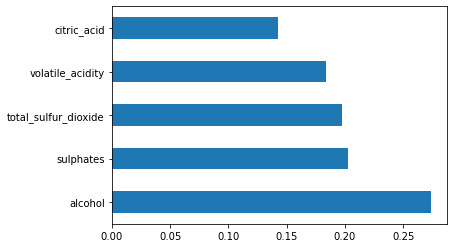

In [135]:
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(11).plot(kind='barh')
plt.show()